1. Plot of the liquid level. 

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

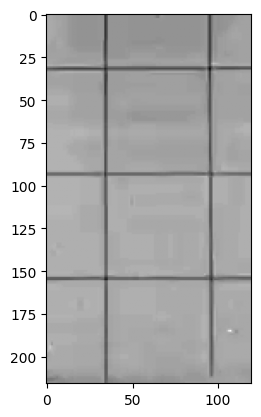

In [8]:

# Open the video file for frame extraction
video_capture = cv2.VideoCapture('liquidVideo.mp4')

# Capture the first frame to use as a reference background
success, background_frame = video_capture.read()

# Convert the background frame to grayscale
background_gray = cv2.cvtColor(background_frame, cv2.COLOR_BGR2GRAY)

# Display the grayscale background frame
plt.imshow(background_gray, cmap='gray')
plt.show()




In [9]:
# Initialize lists to store liquid level data
liquid_level_percentages = []
liquid_level_areas = []
frame_index = 0 

# Loop through each frame in the video
while(video_capture.isOpened()):
    # Read the next frame from the video
    success, current_frame = video_capture.read()
    if not success:
        break
    
    # Convert the current frame to grayscale
    current_frame_gray = cv2.cvtColor(current_frame, cv2.COLOR_BGR2GRAY)

    # Compute the difference between the background and the current frame
    difference_image = cv2.subtract(background_gray, current_frame_gray)

    # Apply thresholding to create a binary image
    _, binary_image = cv2.threshold(difference_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Identify contours in the binary image
    contours, _ = cv2.findContours(binary_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Sort contours by area in descending order
    contours = sorted(contours, key=cv2.contourArea, reverse=True)

    # Determine the area of the largest contour
    frame_height, frame_width = binary_image.shape
    frame_total_area = frame_height * frame_width
    if contours:
        largest_contour_area = cv2.contourArea(contours[0])
        liquid_percentage = round((largest_contour_area / frame_total_area) * 100, 1)
        liquid_area_pixels = largest_contour_area  # Area in pixels of the largest contour
    else:
        liquid_percentage = 0  # No significant contour detected
        liquid_area_pixels = 0

    # Save the liquid level data for analysis
    liquid_level_percentages.append(liquid_percentage)
    liquid_level_areas.append(liquid_area_pixels)

    # Increment the frame index
    frame_index += 1


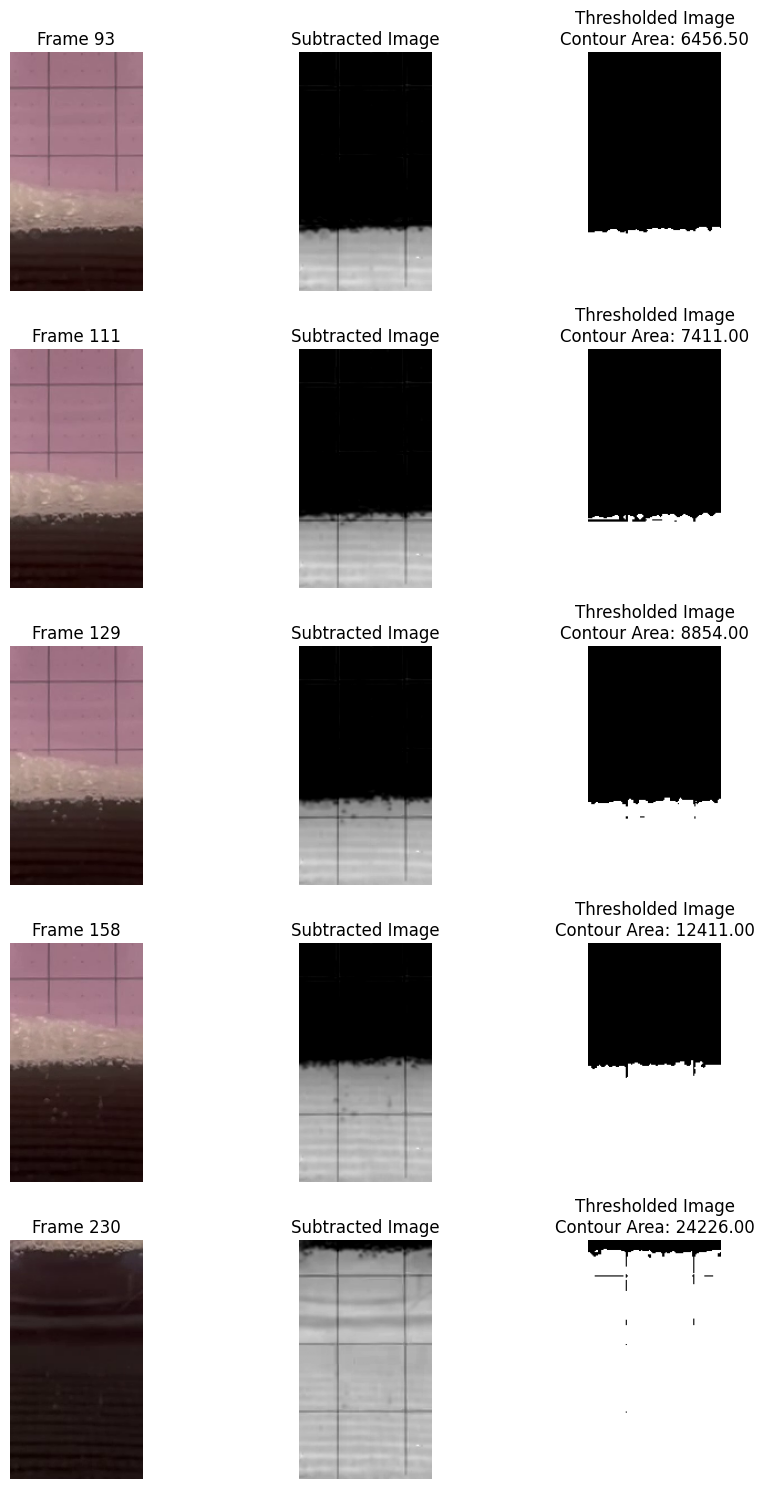

In [10]:
import random

# Select 5 random frame indices in ascending order
selected_frame_indices = sorted(random.sample(range(frame_index), 5))

# Create a figure with subplots for visualization
figure, axes = plt.subplots(len(selected_frame_indices), 3, figsize=(10, 15))

for idx, frame_position in enumerate(selected_frame_indices):
    # Set the video to the specific frame position
    video_capture.set(cv2.CAP_PROP_POS_FRAMES, frame_position)
    
    # Read the frame at the specified position
    success, current_frame = video_capture.read()
    if not success:
        continue

    # Apply Gaussian blur to reduce noise in the frame
    blurred_frame = cv2.GaussianBlur(current_frame, (5, 5), 0)
    
    # Convert the blurred frame to grayscale
    grayscale_frame = cv2.cvtColor(blurred_frame, cv2.COLOR_BGR2GRAY)
    
    # Compute the difference between the background and the current frame
    subtracted_image = cv2.subtract(background_gray, grayscale_frame)

    # Apply thresholding to create a binary image
    _, thresholded_image = cv2.threshold(subtracted_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Identify contours in the binary image
    contours, _ = cv2.findContours(thresholded_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    # Sort contours by area in descending order
    contours = sorted(contours, key=cv2.contourArea, reverse=True)
    
    # Compute the area of the largest contour
    largest_contour_area = cv2.contourArea(contours[0]) if contours else 0
    
    # Display the original frame
    axes[idx, 0].imshow(cv2.cvtColor(current_frame, cv2.COLOR_BGR2RGB))
    axes[idx, 0].set_title(f'Frame {frame_position}')
    axes[idx, 0].axis('off')
    
    # Display the subtracted image
    axes[idx, 1].imshow(subtracted_image, cmap='gray')
    axes[idx, 1].set_title('Subtracted Image')
    axes[idx, 1].axis('off')
    
    # Display the thresholded image with contour area
    axes[idx, 2].imshow(thresholded_image, cmap='gray')
    axes[idx, 2].set_title(f'Thresholded Image\nContour Area: {largest_contour_area:.2f}')
    axes[idx, 2].axis('off')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


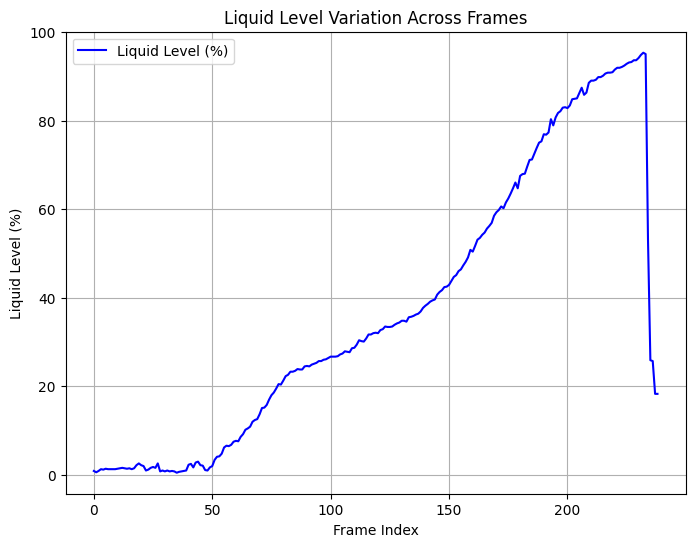

In [11]:
# Create a new figure for the liquid level plot
plt.figure(figsize=(8, 6))

# Plot the liquid level percentage against the frame index
plt.plot(range(frame_index), liquid_level_percentages, label='Liquid Level (%)', color='blue')

# Set the x-axis and y-axis labels along with the title
plt.xlabel('Frame Index')
plt.ylabel('Liquid Level (%)')
plt.title('Liquid Level Variation Across Frames')

# Add a grid and legend to the plot
plt.grid(True)
plt.legend(loc='upper left')

# Display the plot
plt.show()


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

2. A brief note on what the student understood by reading the section on Otsu's threholding method.


Otsu's thresholding technique is used to automatically determine the best threshold value to separate an image into foreground and background regions. It works by testing all potential threshold values and selecting the one that maximizes the difference between these two areas. This method is particularly useful when there is a noticeable contrast, such as between light and dark sections. In OpenCV, Otsu's thresholding is applied through the `cv2.threshold` function with the `cv2.THRESH_OTSU` option. To enhance the results, preprocessing steps like Gaussian Blur are often applied to smooth the image. This technique is commonly used in applications such as document scanning and separating objects in images.

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

3. 2 examples of probable erroraneous liquid level readings, when using Otsu's method. Show with annoted images.

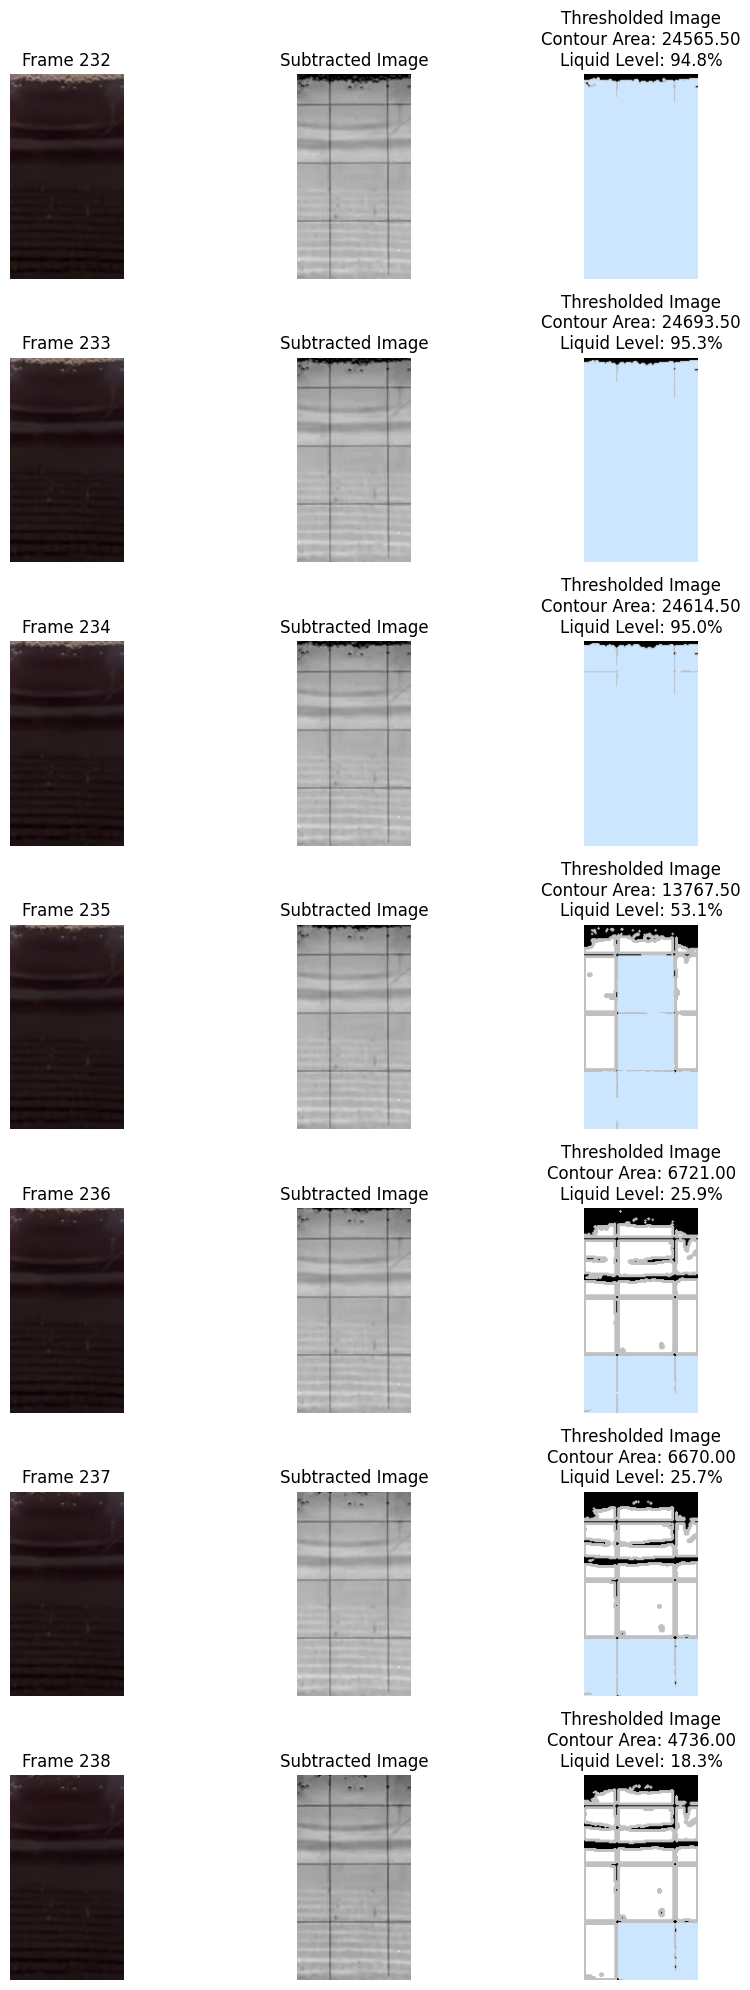

In [12]:
# Select the last 5 frames from the video
last_frame_indices = range(frame_index - 7, frame_index)

# Create a figure with subplots to display images for each frame
figure, axes = plt.subplots(len(last_frame_indices), 3, figsize=(10, 20))

for idx, frame_position in enumerate(last_frame_indices):
    # Set the video to the specific frame position
    video_capture.set(cv2.CAP_PROP_POS_FRAMES, frame_position)
    
    # Read the frame at the specified position
    success, current_frame = video_capture.read()
    if not success:
        continue
    
    # Convert the current frame to grayscale
    grayscale_frame = cv2.cvtColor(current_frame, cv2.COLOR_BGR2GRAY)
    
    # Subtract the background from the current grayscale frame
    subtracted_image = cv2.subtract(background_gray, grayscale_frame)
    
    # Apply thresholding to create a binary image
    _, thresholded_image = cv2.threshold(subtracted_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Find contours in the thresholded image
    contours, _ = cv2.findContours(thresholded_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    # Sort contours by size in descending order
    contours = sorted(contours, key=cv2.contourArea, reverse=True)
    
    # Calculate the area of the largest contour
    largest_contour_area = cv2.contourArea(contours[0]) if contours else 0
    liquid_level_percentage = round((largest_contour_area / frame_total_area) * 100, 1) if contours else 0

    # Draw the contours on the thresholded image
    thresholded_image = cv2.cvtColor(thresholded_image, cv2.COLOR_GRAY2BGR)
    cv2.drawContours(thresholded_image, contours, -1, (192, 192, 192), 2)

    # Shade the area of the largest contour on the thresholded image
    if contours:
        cv2.fillPoly(thresholded_image, pts=[contours[0]], color=(204, 230, 255))

    # Display the original frame
    axes[idx, 0].imshow(cv2.cvtColor(current_frame, cv2.COLOR_BGR2RGB))
    axes[idx, 0].set_title(f'Frame {frame_position}')
    axes[idx, 0].axis('off')
    
    # Display the subtracted image
    axes[idx, 1].imshow(subtracted_image, cmap='gray')
    axes[idx, 1].set_title('Subtracted Image')
    axes[idx, 1].axis('off')
    
    # Display the thresholded image with contour area and liquid level
    axes[idx, 2].imshow(thresholded_image, cmap='gray')
    axes[idx, 2].set_title(f'Thresholded Image\nContour Area: {largest_contour_area:.2f}\nLiquid Level: {liquid_level_percentage:.1f}%')
    axes[idx, 2].axis('off')

# Adjust layout for better presentation
plt.tight_layout()
plt.show()


The threshold image clearly shows the erroneous liquid level reading. All contours are marked with ash lines, while the largest contour is highlighted in water blue. This error in the reading occurs due to the presence of scattered square patterns in the threshold image, which arise when using Otsu's thresholding method

In the generated liquid level over frame count plot, an unusual decrease in the liquid percentage is observed after the 235th frame, even though no such change occurred in the actual video. This discrepancy is due to errors in liquid level detection when using Otsu's thresholding method.

These errors occur during the contouring process after thresholding. By the 235th frame, most of the liquid was filled, and the subtracted image revealed black grid-like patterns in the background. These patterns appeared in the thresholded image as small square grids, leading to multiple split contours. Consequently, when identifying the largest contour, the algorithm only selected the largest split contour instead of the entire liquid region. This issue caused the plotted graph to show a decrease after the 235th frame.


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

4. A brief description on the final algorithm developed by the student.

The algorithm begins by selecting the first frame as the background, which is then converted to grayscale. For each subsequent frame, it is also converted to grayscale, and the difference from the background frame is calculated to highlight changes, such as the liquid level. Thresholding is applied to the resulting difference image to enhance the visibility of contours. These contours are detected using the `cv2.findContours` function, and the largest contour is identified as it corresponds to the liquid level. The liquid level percentage is then calculated by comparing the vertical position of the largest contour to the total height of the container. This percentage, along with the corresponding frame number, is stored for each frame. Finally, after processing the video, a graph is plotted using a library like matplotlib to visualize the liquid level percentage over time.